In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [2]:
def read_merged(weather, year):
    return pd.read_csv('../../merged/merged_{}_{}.csv.gz'.format(weather, year)).drop(columns=['Unnamed: 0'])

In [3]:
hail = read_merged('hail',2020)

In [4]:
hail.head()

,DATE,MONTH,LAT,LON,SEVPROB,PROB,MAXSIZE,COUNTY,STATE,POWER_OUTAGE
0,2020-01-01,1,47.959116,-121.733282,60,70,0.5,Snohomish County,Washington,False
1,2020-01-01,1,47.666000,-122.592170,10,10,0.5,Kitsap County,Washington,False
2,2020-01-01,1,43.846297,-117.256990,40,60,0.5,Malheur County,Oregon,False
3,2020-01-01,1,43.149915,-116.035440,50,60,0.5,Elmore County,Idaho,False
4,2020-01-01,1,43.285990,-116.681150,10,10,0.5,Owyhee County,Idaho,False


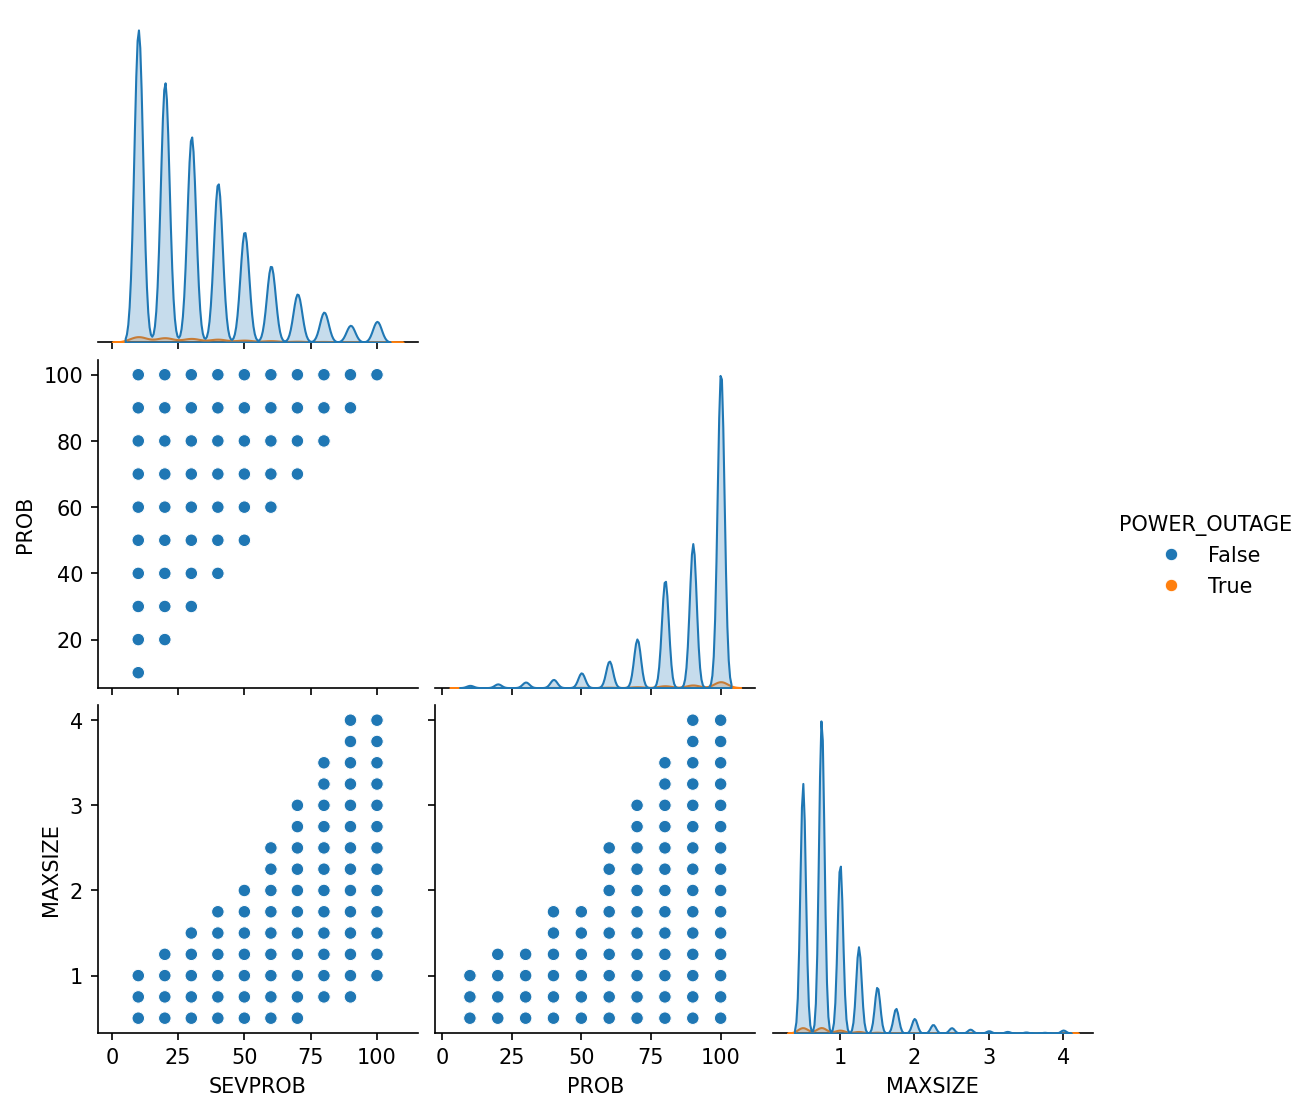

In [5]:
sns.pairplot(hail, x_vars=['SEVPROB', 'PROB', 'MAXSIZE'],
                   y_vars=['SEVPROB', 'PROB', 'MAXSIZE'], hue='POWER_OUTAGE', corner=True)

In [6]:
outage = hail[hail['POWER_OUTAGE']==True]
no_outage = hail[hail['POWER_OUTAGE']==False]
no_outage = no_outage.sample(n=len(outage))
hail_balanced = pd.concat([outage, no_outage],axis=0)

In [7]:
hail_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27716 entries, 1470 to 78029
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          27716 non-null  object 
 1   MONTH         27716 non-null  int64  
 2   LAT           27716 non-null  float64
 3   LON           27716 non-null  float64
 4   SEVPROB       27716 non-null  int64  
 5   PROB          27716 non-null  int64  
 6   MAXSIZE       27716 non-null  float64
 7   COUNTY        27716 non-null  object 
 8   STATE         27716 non-null  object 
 9   POWER_OUTAGE  27716 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 2.1+ MB


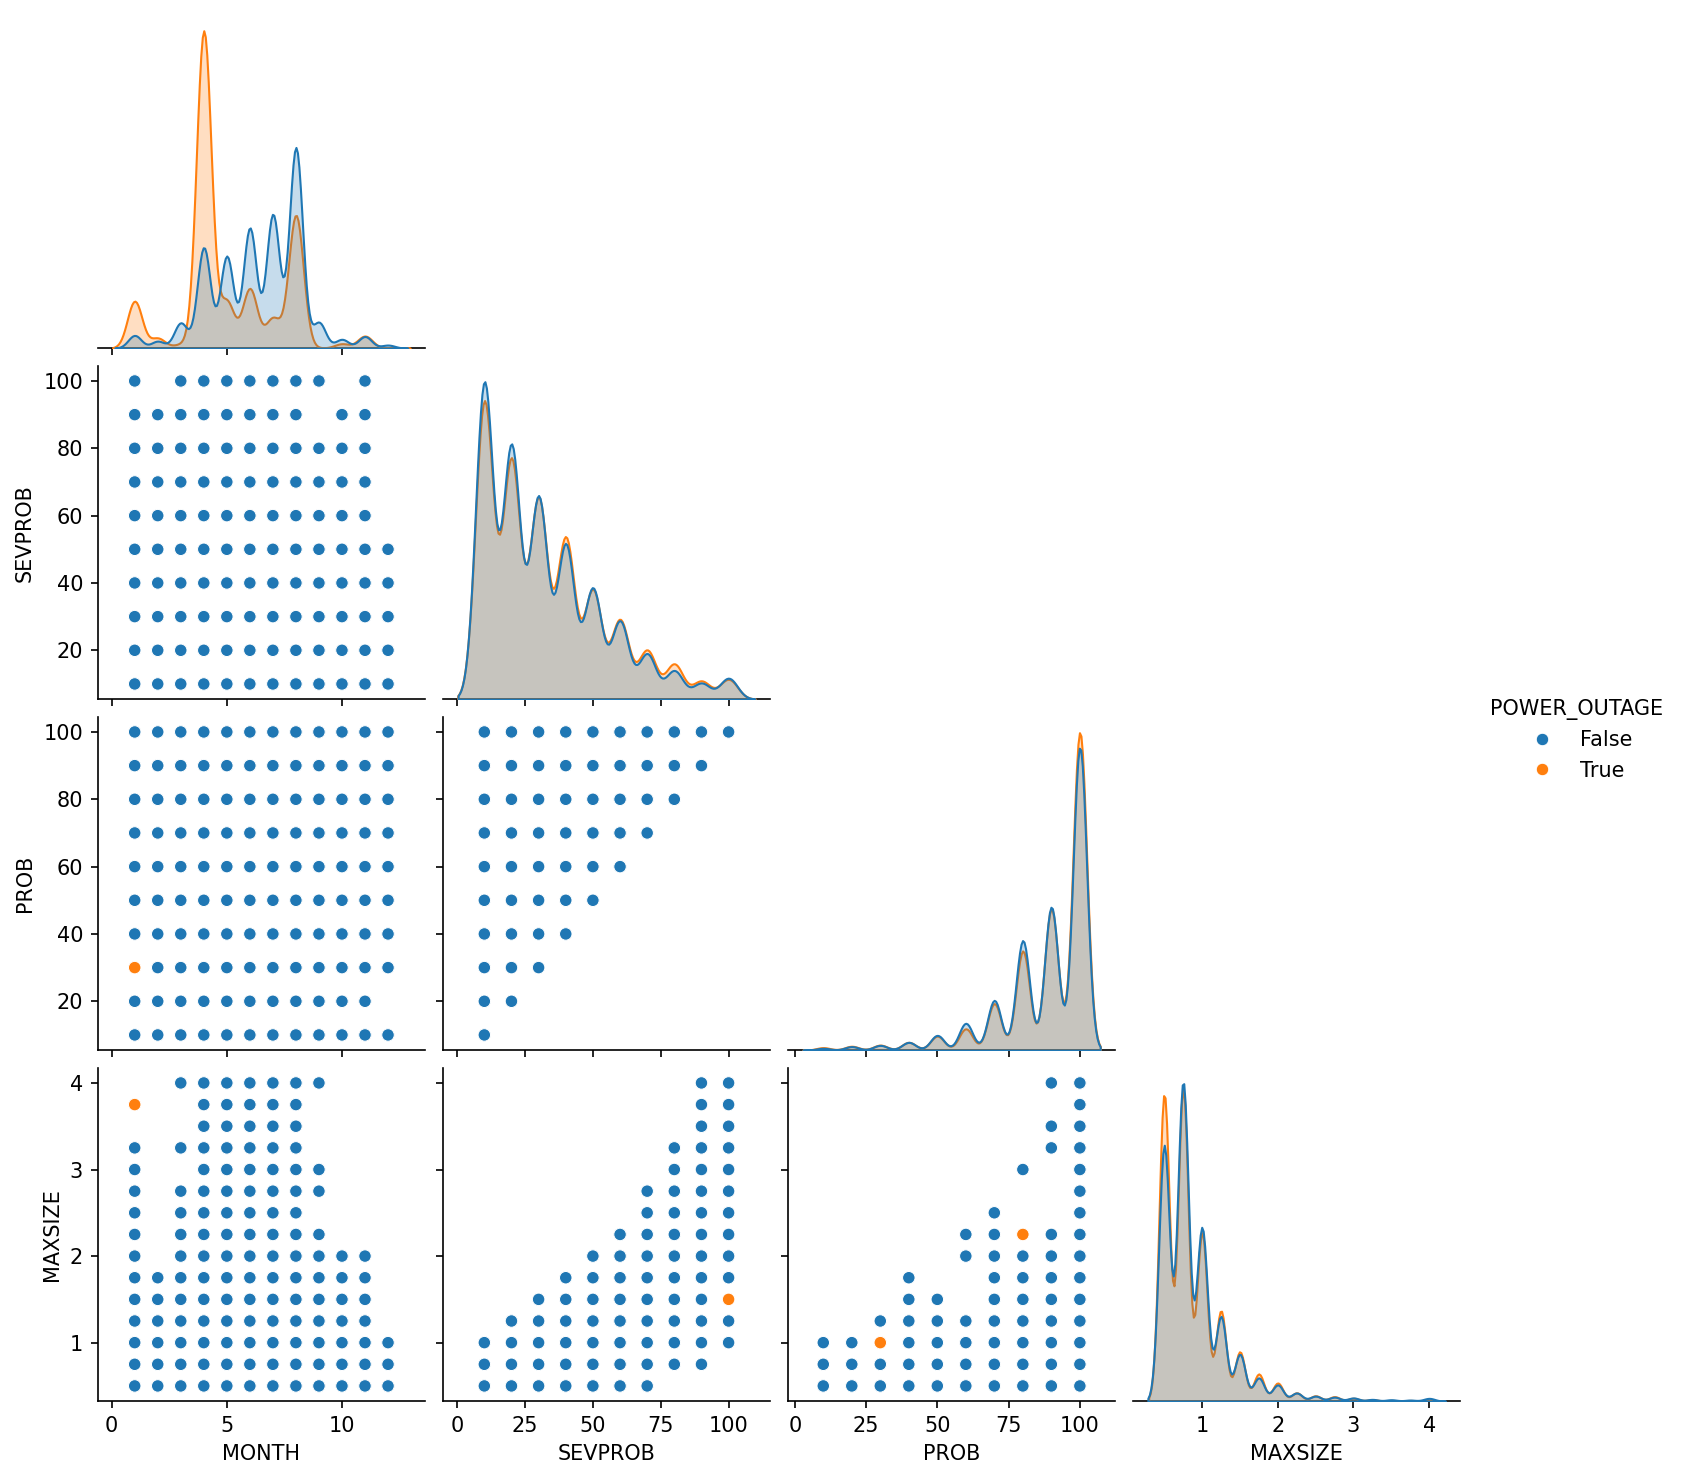

In [8]:
sns.pairplot(hail_balanced, x_vars=['MONTH', 'SEVPROB', 'PROB', 'MAXSIZE'],
                            y_vars=['MONTH','SEVPROB', 'PROB', 'MAXSIZE'], hue='POWER_OUTAGE', corner=True)